## Imports

In [151]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import train_test_split

## Load the Game Data

In [2]:
data = pd.read_csv('starcraft_player_data.csv')

Let's take a quick look at some of the data

In [3]:
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
print(data.isnull().sum())

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64


In [5]:
# Drop the GameID variable, as it serves only as an index and not as a feature, also rename LeagueIndex to Target for easy identification
data = data.drop(['GameID'], axis = 1)
data.rename(columns = {'LeagueIndex' : 'Target'})

,Target,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.000000,0.000208
2,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [6]:
data.dtypes
# we have some non-numerical values that we'll have to change to numeric. We will do this while we impute values for our missing values

LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

## Imputing Missing Values

In [7]:
# We have some '?' values which signify missing values
# let's identify the data points with "?" in them by first converting them to nan values
data = data.replace('?', np.nan)
data.isnull().sum()


LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

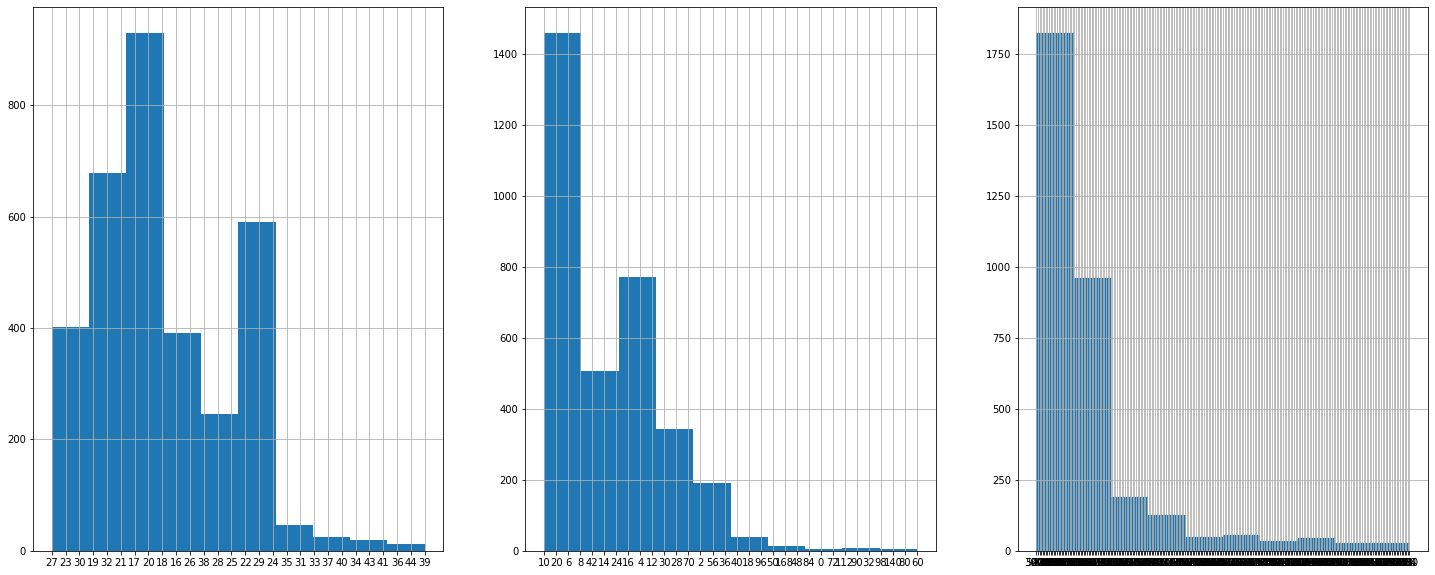

In [8]:
# there are 3 columns with missing values
# instead of removing them, the data is the other columns are all useful. Let's look at the distributions to see what we might want to impute with
#data['Age'].fillna(data['Age'].mean(), inplace = True)
#pd.to_numeric(data[['Age', 'HoursPerWeek']]).hist()
fig, axes = plt.subplots(1, 3)
data['Age'].hist(figsize=(25, 10),ax = axes[0])
data['HoursPerWeek'].hist(ax = axes[1])
data['TotalHours'].hist(ax = axes[2])

In [9]:
# given that none of the distributions are normal, it might make the most sense to use the median of each column as the imputed value
# while we are at it, let's convert the numbers to numeric values, so that we can actually use them as such
data['Age'] = pd.to_numeric(data['Age'].fillna(data['Age'].median()))
data['HoursPerWeek'] = pd.to_numeric(data['HoursPerWeek'].fillna(data['HoursPerWeek'].median()))
data['TotalHours'] = pd.to_numeric(data['TotalHours'].fillna(data['TotalHours'].median()))
data.isnull().sum()

LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [10]:
data.dtypes

LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012B5CC50608>,
      dtype=object)

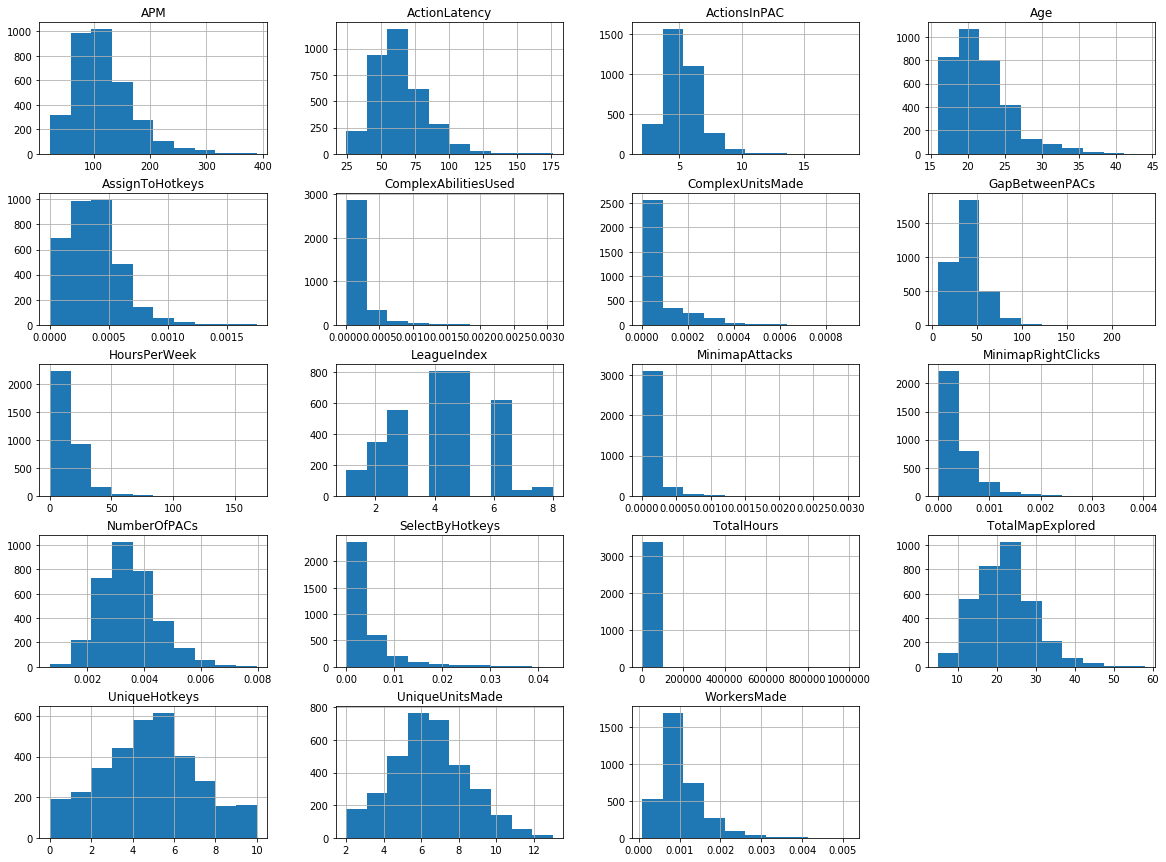

In [11]:
#Let's take a look at the histograms for each feature since there aren't too many
data.hist(figsize=(20,15), bins = 10)

### We have a good set of features. My initial analysis indicates that a lot of these distributions are normal distributions, but there are a couple features with heavy skew and long tails (e.g selectByHotkeys). GameID doesn't provide any information, and will be removed from the set of features. All other variables are numerical, most of which are continous. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012B5F157708>,
      dtype=object)

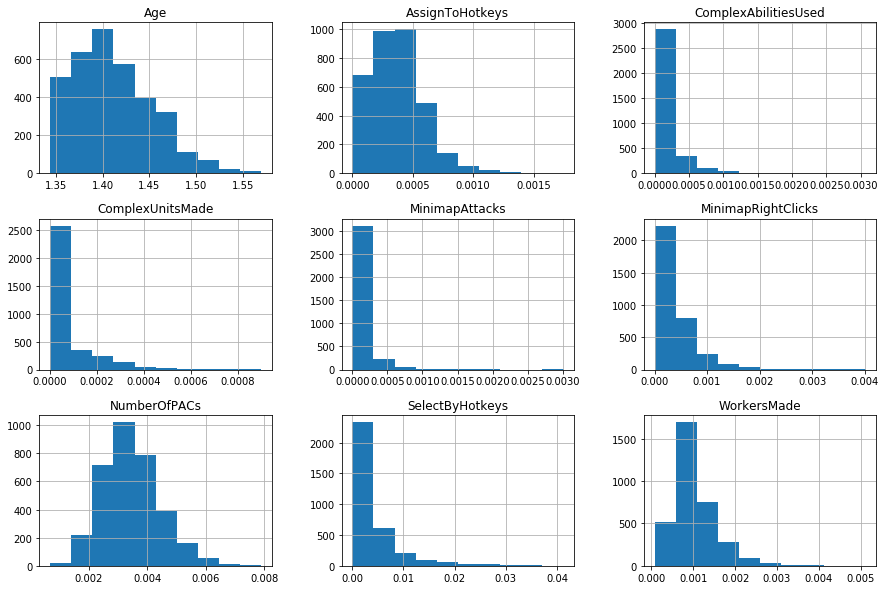

In [23]:
# for variables with high skew, let's log normalize them so that it's easier for our model to analyze them. Use a threshold value of 0.5 for skew
skewed = data.skew()
skewed = skewed[skewed > 0.5]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

# plot the transofmred columns
data[skewed].hist(figsize = (15, 10))

In [24]:
data.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,1.411079,2.619062,6.134597,4.679308,0.004253,0.000373,4.364654,0.000098,0.000387,0.003450,3.647460,4.129335,1.810654,3.088276,0.001030,6.534021,0.000059,0.000142
std,1.517327,0.041882,0.645693,0.914732,0.432476,0.005160,0.000225,2.360333,0.000166,0.000376,0.000985,0.383969,0.284675,0.223153,0.331962,0.000517,1.857697,0.000111,0.000265
min,1.000000,1.343703,0.000000,1.386294,3.138082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,2.036886,3.222613,1.111496,1.791759,0.000077,2.000000,0.000000,0.000000
25%,3.000000,1.385227,2.197225,5.707110,4.393216,0.001256,0.000204,3.000000,0.000000,0.000140,0.002746,3.399788,3.940544,1.662571,2.890372,0.000682,5.000000,0.000000,0.000000
50%,4.000000,1.408800,2.564949,6.216606,4.691441,0.002493,0.000352,4.000000,0.000040,0.000281,0.003384,3.630283,4.126034,1.807551,3.135494,0.000904,6.000000,0.000000,0.000020
75%,5.000000,1.439569,3.044522,6.685861,4.968357,0.005106,0.000499,6.000000,0.000119,0.000514,0.004011,3.897731,4.313230,1.950699,3.332205,0.001257,8.000000,0.000086,0.000181
max,8.000000,1.570003,5.129899,13.815512,5.968276,0.041320,0.001749,10.000000,0.003010,0.004025,0.007908,5.472871,5.178250,2.973390,4.077537,0.005123,13.000000,0.000901,0.003074


## Feature Selection
Since there aren't that many features, we probably won't have to perform much dimensionality reduction, but let's take a look at the correlation matrix and see which features look helpful

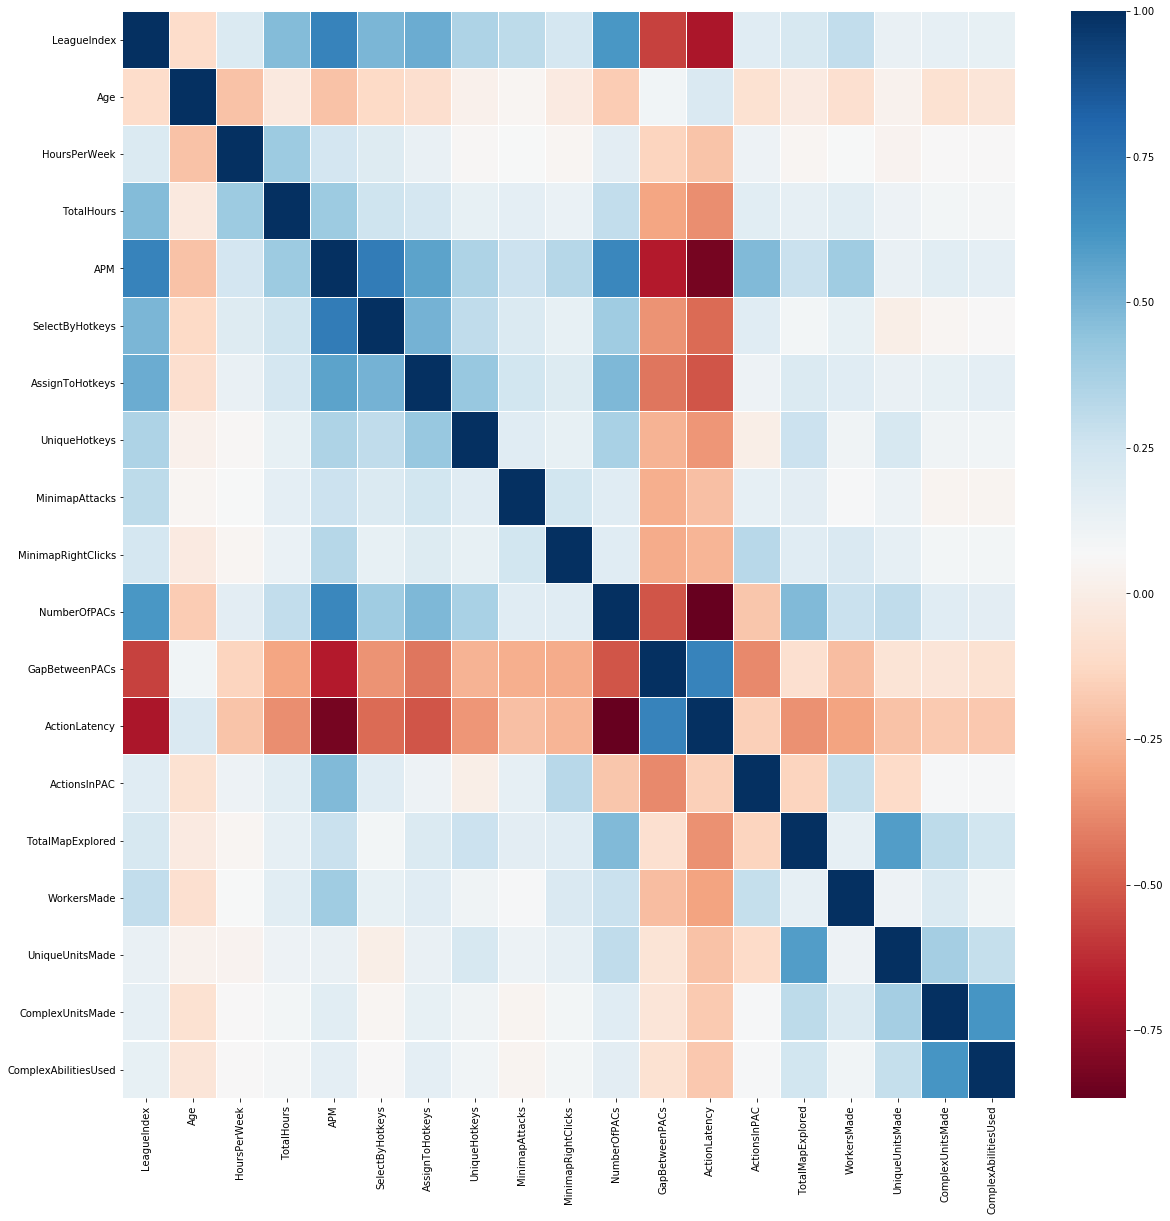

In [25]:
# Build a correlation map of all variables including the target variable
plt.figure(figsize = (20,20))
corr = data.corr()
sns.heatmap(corr, linewidths=0.1,cmap=plt.cm.RdBu,annot=False, fmt='.2f')

### We can already see that it looks like some features will have more relation than others on a player's ranking. Most notably, PAC numbers seem to be related to league rank. 

In [82]:
# Given our sample size isn't very large, we should select features that will actually contribute to model accuracy rather than just noise
# let's remove some of the highly correlated variables
data = data.drop(columns = ['NumberOfPACs'], axis = 1)

## Build Models
Let's build some models. First, we should define a base model that we can use to compare the performance of our model. We will use a naive model that always picks the most frequent rank in the dataset.
For our ML model, we can go with a simple neural network to aid us in our classification

In [138]:
# Let's also separate our target variable and features
training, testing = train_test_split(data, test_size = 0.2, random_state = 25)
X_train = training.drop(['LeagueIndex'], axis = 1)
Y_train = training['LeagueIndex']

X_test = testing.drop(['LeagueIndex'], axis = 1)
Y_test = testing['LeagueIndex']

In [139]:
# let's setup a really baseline naive model using the most frequently seen rank always as the predicted output (i.e if rank 1 is the most frequently appearing rank, we will always predict rank 1)
def build_naive(Y_train, Y_test):
    pred = Y_train.mode()
    print(f"The most frequent rank is {pred[0]}")
    print(f"The accuracy of the naive model is {len(Y_test[Y_test == 4])/len(Y_test)}" )

build_naive(Y_train, Y_test)

The most frequent rank is 4
The accuracy of the naive model is 0.23269513991163476


### Looks like if we just guess 4 all the time, our accuracy is really low. No surprise there, but this will serve as a decent baseline.

In [140]:
X_train.shape
Y_train.shape

(2716,)

In [141]:
# build a simple logistic regression classifier
def build_log_reg(X_train, Y_train):
    lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
    
    lm.fit(X_train, Y_train)
    return lm
    

In [142]:
model = build_log_reg(X_train, Y_train)
model.score(X_test, Y_test)

0.3784977908689249

array([[ 4, 10, 13,  9,  0,  0,  0,  0],
       [ 5, 11, 19, 34,  4,  1,  0,  0],
       [ 2,  9, 17, 67, 12,  3,  0,  0],
       [ 0,  6, 12, 97, 34,  9,  0,  0],
       [ 0,  0,  3, 53, 65, 45,  0,  1],
       [ 0,  0,  0, 10, 44, 61,  0,  0],
       [ 0,  0,  0,  0,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  2]], dtype=int64)

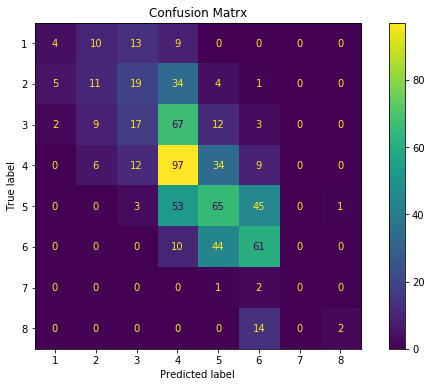

In [143]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(model, X_test, Y_test,  ax = ax)
disp.confusion_matrix

### We can see that the accuracy of our logistic classifier is about 38%. This is a big improvement against the naive model, but still pretty lackluster. If we look at the confusion matrix, the logistic regression is really only doing well classifying the rank 4, 5, and 6 datapoints. We might improve this by looking at the data for other ranks, and seeing if there is some pattern that we can account for that will make our model more accurate. Let's try a more powerful model, a simple neural network. 

In [147]:
# build a simple neural network using keras
# use 1 input layer, 2 hidden layers (with relu activation), 1 output layer using softmax activation function
# use adam optimizer for gradient descent
def build_nn():
  # Clear session and remove randomness.
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(units=64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(units=128, activation = 'relu'))

    model.add(tf.keras.layers.Dense(
        units = 9,
        activation = tf.keras.activations.softmax
    ))

    model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])


    return model

In [148]:
#Function to show model loss progression across epochs

def plot_history(history):
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xticks(range(0, len(history['loss'] + 1)))
    plt.plot(history['loss'], label="training", marker='o')
    plt.plot(history['val_loss'], label="validation", marker='o')
    plt.legend()
    plt.show()

Epoch 1/10
39/39 [==============================] - 0s 4ms/step - loss: 1.8878 - accuracy: 0.2750 - val_loss: 1.7082 - val_accuracy: 0.2757
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 1.6393 - accuracy: 0.3056 - val_loss: 1.6127 - val_accuracy: 0.2794
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5723 - accuracy: 0.3457 - val_loss: 1.5608 - val_accuracy: 0.3382
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5225 - accuracy: 0.3539 - val_loss: 1.5130 - val_accuracy: 0.3603
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 1.4979 - accuracy: 0.3502 - val_loss: 1.5154 - val_accuracy: 0.3382
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 1.4659 - accuracy: 0.3674 - val_loss: 1.4727 - val_accuracy: 0.3787
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 1.4362 - accuracy: 0.3727 - val_loss: 1.4631 - val_accuracy: 0.3713
Epoch 8/10
39/39 [==

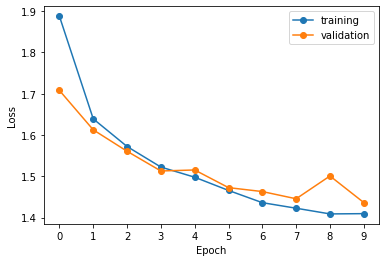

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 10,633
Trainable params: 10,633
Non-trainable params: 0
_________________________________________________________________
None


In [150]:
#Building, running the keras model and examining outputs.

tf.random.set_seed(1234)

model = build_nn()
history = model.fit(
  x = X_train,    # training data
  y = tf.keras.utils.to_categorical(Y_train),          # corresponding labels
  epochs = 10,             # number of passes through the training data
  batch_size = 64,        # mini-batch size
  validation_split = 0.1, # use a fraction of the examples for validation
  verbose = 1             # display some progress output during training
  )

history = pd.DataFrame(history.history)
plot_history(history)

print(model.summary())

# Final thoughts

In this project, we have a problem where we are looking to identify what rank a player is based on some of their game statistics. To solve this problem, I examined the data, selected features, and built 3 models that predict what rank a player is based on the given statistics. The 3 models included a naive model that always predicted whatever the most frequent rank is (in the case of the data provided it is rank 4). This model correctly identified the ranks of 23% of the datapoints in my test set. This model serves as a simple baseline model that we can use to compare to our other models. The second model is a simple logistic model that produced an accuracy of 37%. Finally, the third model is a neural network that produced an accuracy of 39%. The models are also in order of increasing complexity, meaning that the neural network generally needs a larger dataset to perform well, otherwise it will tend to overfit (learn about patterns from the data that are actually just noise) on the training data. 

Overall, the performance of the models can also be increased by determining features that are more likely to help determine rank. We can see from the correlation matrix, that a lot of the features in this dataset are not strongly correlated with a player's rank. Therefore, as we collect more data, we need to be more intentional about which statistics we want to record and use as features. The models have a lot of room for growth, so we are definitely missing out on some great information. 